In [1]:
import pandas as pd

# 替换 'your_file.csv' 为你的CSV文件路径
csv_file_path = 'data_q4.csv'

# 读取CSV文件
df = pd.read_csv(csv_file_path)

# 打印数据的前几行，查看数据结构
print("原始数据：")
print(df.head())

# 在这里进行一些数据整理操作，例如删除不需要的列、处理缺失值、重命名列等

原始数据：
     Year Disaster Type Dis Mag Scale  Total Deaths  Total Affected  \
0  1980.0         Flood           Km2          38.0         40100.0   
1  1980.0         Flood           Km2        6200.0         67000.0   
2  1981.0         Flood           Km2        1311.0       1528140.0   
3  1981.0         Flood           Km2         240.0        100000.0   
4  1986.0         Storm           Kph          36.0          7500.0   

   Total Damages ('000 US$)  Adm Level  
0                       NaN        NaN  
1                  160000.0        NaN  
2                 1100000.0        NaN  
3                       NaN        NaN  
4                    3200.0        NaN  


In [2]:
# 将后四列的空值用0替代
df.iloc[:, -4:] = df.iloc[:, -4:].fillna(0)
print(df.head())

     Year Disaster Type Dis Mag Scale  Total Deaths  Total Affected  \
0  1980.0         Flood           Km2          38.0         40100.0   
1  1980.0         Flood           Km2        6200.0         67000.0   
2  1981.0         Flood           Km2        1311.0       1528140.0   
3  1981.0         Flood           Km2         240.0        100000.0   
4  1986.0         Storm           Kph          36.0          7500.0   

   Total Damages ('000 US$)  Adm Level  
0                       0.0        0.0  
1                  160000.0        0.0  
2                 1100000.0        0.0  
3                       0.0        0.0  
4                    3200.0        0.0  


In [3]:
# 按年份整合数据，对4，5，6列进行相加，其他列保留第一个值
df_grouped = df.groupby('Year').agg({
    'Disaster Type': 'first',
    'Dis Mag Scale': 'first',
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    "Total Damages ('000 US$)": 'sum',
    'Adm Level': 'first'
}).reset_index()

In [4]:
# 删除重复的年份，只保留第一个出现的行
df_grouped = df_grouped.drop_duplicates(subset='Year', keep='first')

# 保存整理后的数据到新的CSV文件
output_file_path = 'q4_cleaned.csv'
df_grouped.to_csv(output_file_path, index=False)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


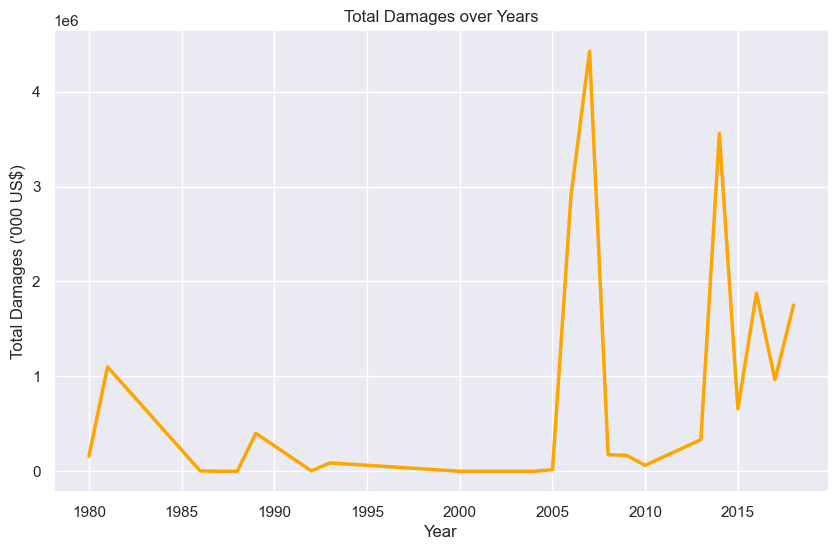

In [6]:
# 设置 Seaborn 的风格
sns.set_theme(style="darkgrid")

# 绘制曲线图
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y="Total Damages ('000 US$)", linewidth=2.5,color='Orange')
plt.title('Total Damages over Years')
plt.xlabel('Year')
plt.ylabel('Total Damages (\'000 US$)')
plt.grid(True)
plt.show()

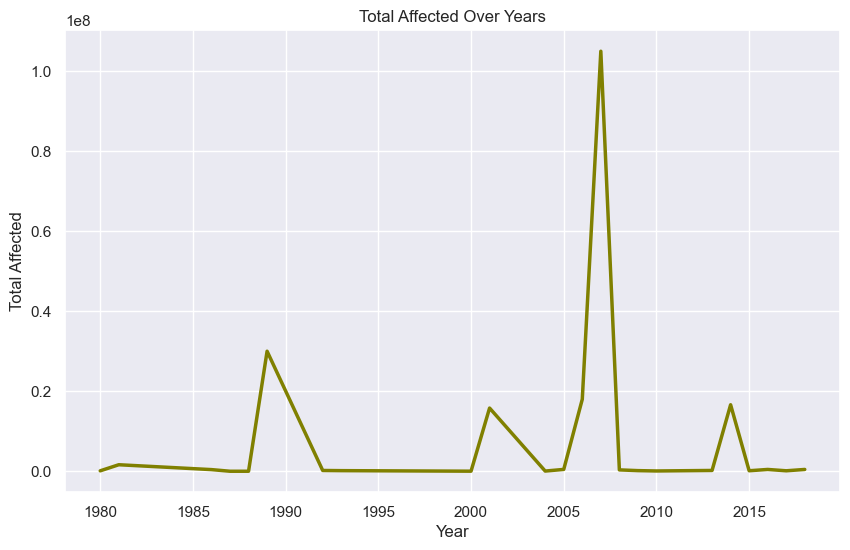

In [7]:
# 设置 Seaborn 的风格
sns.set_theme(style="darkgrid")

# 绘制曲线图
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y="Total Affected", linewidth=2.5,color='Olive')
plt.title('Total Affected Over Years')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.grid(True)
plt.show()

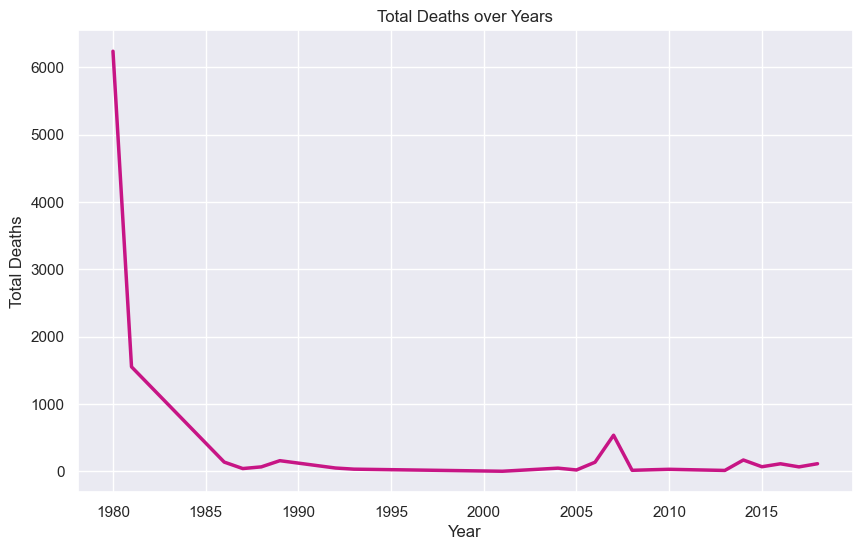

In [8]:
# 设置 Seaborn 的风格
sns.set_theme(style="darkgrid")

# 绘制曲线图
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y="Total Deaths", linewidth=2.5,color='MediumVioletRed')
plt.title('Total Deaths over Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()

In [11]:
import pandas as pd

# 替换 'your_file.csv' 为你的CSV文件路径
csv_file_path = 'dev4_results.csv'

# 读取CSV文件
df = pd.read_csv(csv_file_path)

# 打印数据的前几行，查看数据结构
print("原始数据：")
print(df.head())

# 在这里进行一些数据整理操作，例如删除不需要的列、处理缺失值、重命名列等

原始数据：
     Year Disaster Type Dis Mag Scale  Total Deaths  Total Affected  \
0  1980.0         Flood           Km2        6238.0        107100.0   
1  1981.0         Flood           Km2        1551.0       1628140.0   
2  1986.0         Storm           Kph         136.0        411000.0   
3  1987.0         Storm           Kph          40.0             0.0   
4  1988.0         Storm           Kph          65.0             0.0   

   Total Damages ('000 US$)     Mapped  
0                  160000.0  40.000000  
1                 1100000.0  40.310059  
2                    3200.0  40.198392  
3                       0.0  40.983033  
4                       0.0  42.054405  


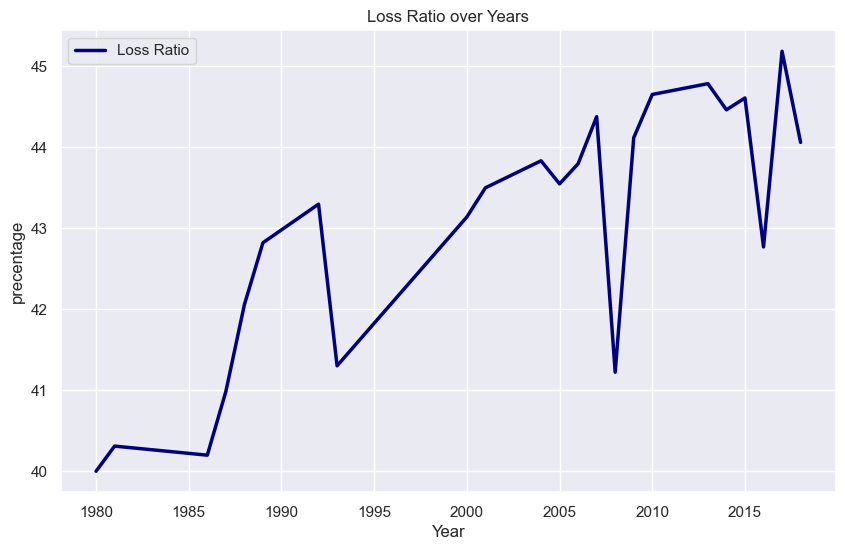

In [12]:
# 设置 Seaborn 的风格
sns.set_theme(style="darkgrid")

# 绘制曲线图
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y="Mapped", linewidth=2.5,label="Loss Ratio",color='Navy')
plt.title('Loss Ratio over Years')
plt.xlabel('Year')
plt.ylabel('precentage')
plt.grid(True)
plt.show()